# The Sparks Foundation - Computer Vision and Internet of Things
### (Task from different Domain)
## GRIP August 21 
## Task - 1
  
# Submitted By - Sanket Mathur

# Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setting up File locations and Checking sample images

In [2]:
# setting the path and the labels list for classification of targets on the basis in human understandable form

# execued from kaggle kernel
train_dir = os.path.join('/kaggle/input/garbage-classification/Garbage classification/Garbage classification') 
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [3]:
# checking the size of data available to us for training out model

for label in labels:
    directory = os.path.join(train_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "cardboard":	 403
Images of label "glass":	 501
Images of label "metal":	 410
Images of label "paper":	 594
Images of label "plastic":	 482
Images of label "trash":	 137


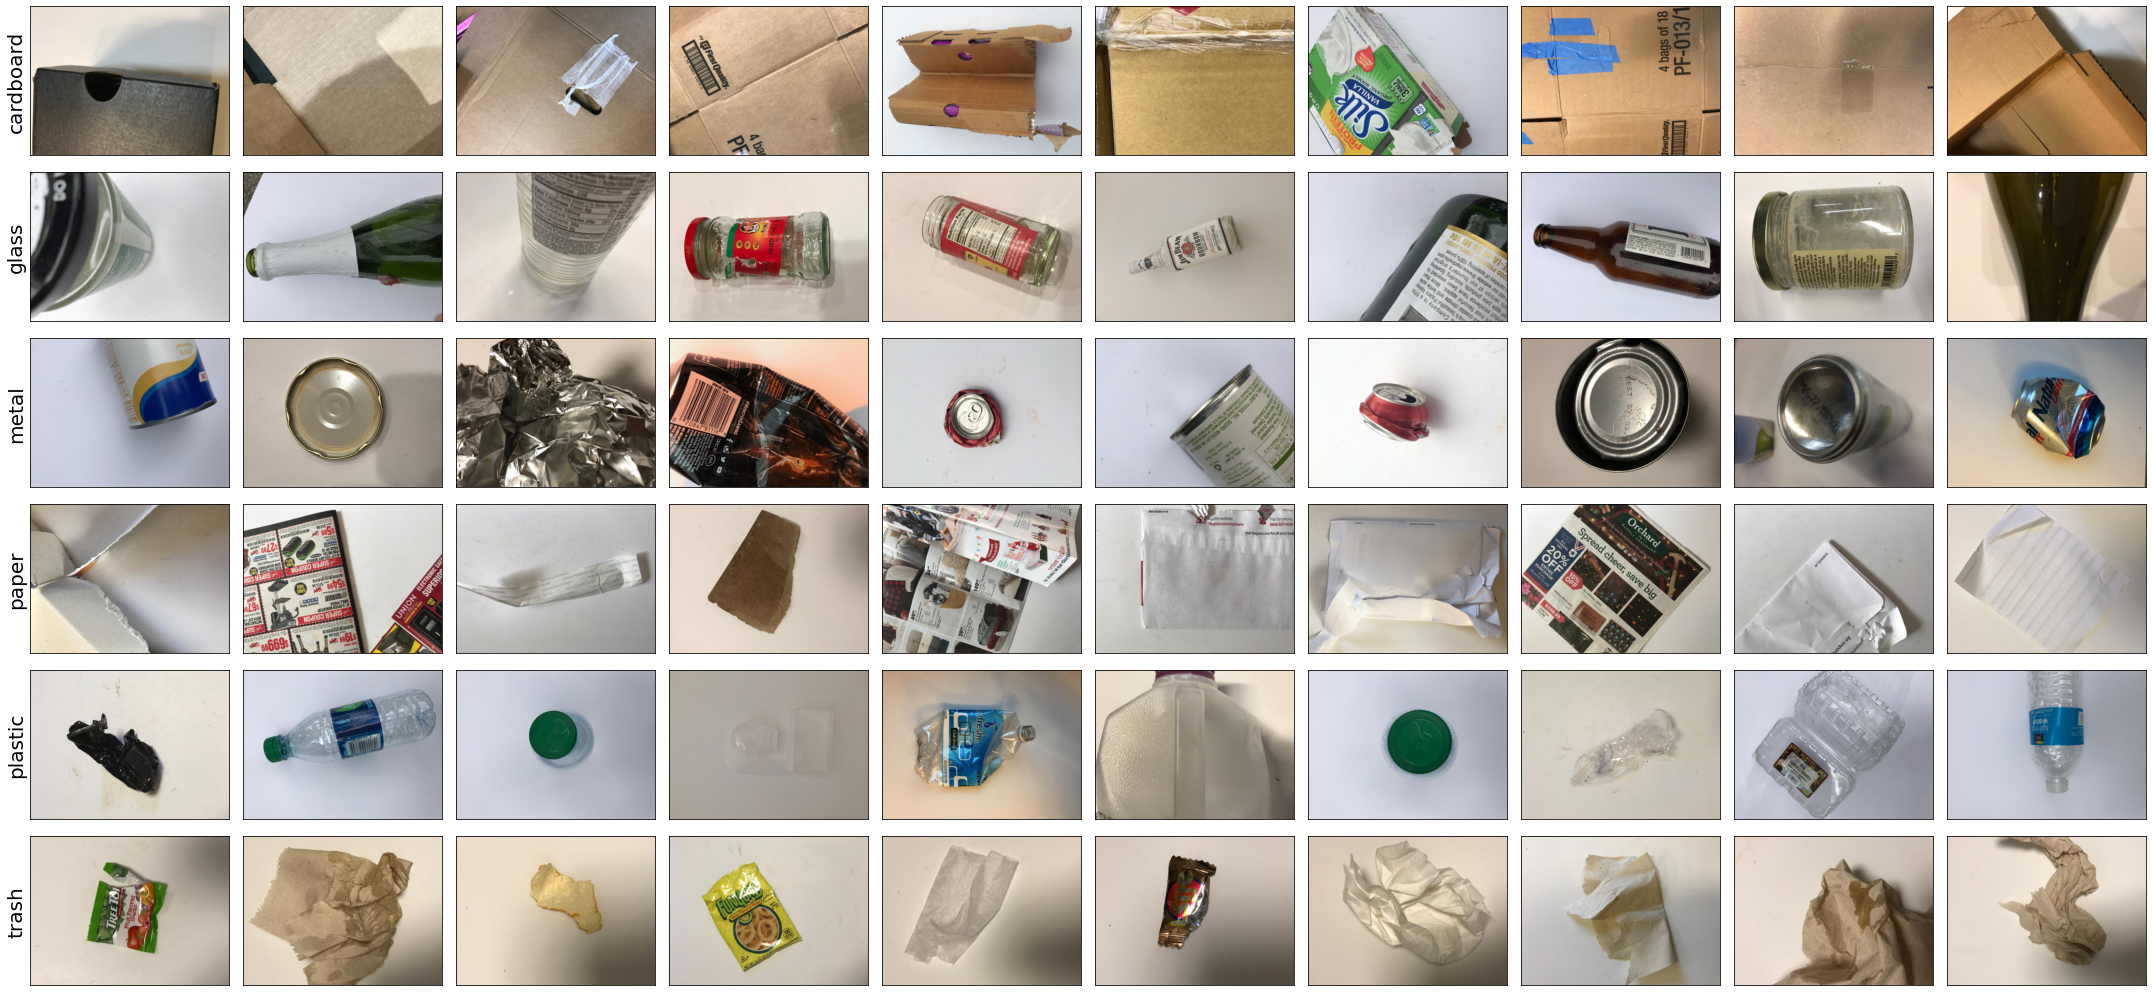

In [4]:
# plotting images of different review for understanding the dataset

plt.figure(figsize=(30,14))

for i in range(6):
    directory = os.path.join(train_dir, labels[i])
    for j in range(10):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(6, 10, i*10 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [5]:
# checking size of individual image

directory = os.path.join(train_dir, 'cardboard')
path = os.path.join(directory, os.listdir(directory)[0])
image = mpimg.imread(path)
image.shape

(384, 512, 3)

# Deep Learning

In [6]:
# creating the model

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(384, 512, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 382, 510, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 382, 510, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 380, 508, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 380, 508, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 190, 254, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 190, 254, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 188, 252, 64)      1

In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(lr = 0.0001), metrics=['accuracy'])

In [8]:
# creating generators for combining data and increasing the gainable insights by slightly modifying the images in the dataset

train_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                                   rotation_range=15,zoom_range=0.1,
                                   width_shift_range=0.15,height_shift_range=0.15,
                                   shear_range=0.1,
                                   fill_mode="nearest",
                                   rescale=1./255., 
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(384, 512), batch_size=32, class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory(train_dir, target_size=(384, 512), batch_size=32, class_mode='binary', subset='validation')

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [9]:
# creating the callback function so that it can be used to end the training in case reached a good accuracy rate (above 90%)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [10]:
history = model.fit(train_generator, epochs=50, verbose=1, validation_data=validation_generator, callbacks=[callbacks])

Epoch 1/50
64/64 [==============================] - 219s 3s/step - loss: 2.0317 - accuracy: 0.4187 - val_loss: 9.6915 - val_accuracy: 0.1571
Epoch 2/50
64/64 [==============================] - 184s 3s/step - loss: 1.2865 - accuracy: 0.5566 - val_loss: 22.0667 - val_accuracy: 0.1590
Epoch 3/50
64/64 [==============================] - 184s 3s/step - loss: 1.2229 - accuracy: 0.5659 - val_loss: 30.3908 - val_accuracy: 0.1590
Epoch 4/50
64/64 [==============================] - 184s 3s/step - loss: 1.1905 - accuracy: 0.5559 - val_loss: 31.5925 - val_accuracy: 0.1590
Epoch 5/50
64/64 [==============================] - 183s 3s/step - loss: 1.0934 - accuracy: 0.6113 - val_loss: 42.5652 - val_accuracy: 0.1650
Epoch 6/50
64/64 [==============================] - 184s 3s/step - loss: 1.0273 - accuracy: 0.6469 - val_loss: 4.2160 - val_accuracy: 0.2068
Epoch 7/50
64/64 [==============================] - 184s 3s/step - loss: 1.0822 - accuracy: 0.6379 - val_loss: 2.4834 - val_accuracy: 0.2545
Epoch 8/5

Enter any category by index:  0
Enter any index to test:  10


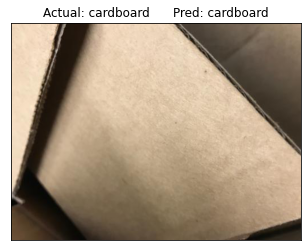

In [20]:
cat = int(input('Enter any category by index: '))
ind = int(input('Enter any index to test: '))

directory = os.path.join(train_dir, labels[cat % 6])
try:
    path = os.path.join(directory, os.listdir(directory)[ind])
    img = mpimg.imread(path)
    x = keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)
    pred = labels[np.argmax(classes)]
    
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title('Actual: {}      Pred: {}'.format(labels[cat], pred))
    
except:
    print('Invalid Value')